## 15.1 RSI

In [16]:
from pykrx import stock

df = stock.get_market_ohlcv_by_date("20000101", "20191231", "005930")
df = df[['종가']]
df.head()

,종가
날짜,
2000-01-04,6110
2000-01-05,5580
2000-01-06,5620
2000-01-07,5540
2000-01-10,5770


In [17]:
df['변화량'] = df['종가'] - df['종가'].shift(1)
df.loc[df['변화량'] >= 0, '상승폭'] = df['변화량']
df.loc[df['변화량'] < 0, '하락폭'] = -df['변화량']
df = df.fillna(0)
df.head()

,종가,변화량,상승폭,하락폭
날짜,,,,
2000-01-04,6110,0.0,0.0,0.0
2000-01-05,5580,-530.0,0.0,530.0
2000-01-06,5620,40.0,40.0,0.0
2000-01-07,5540,-80.0,0.0,80.0
2000-01-10,5770,230.0,230.0,0.0


In [18]:
df['AU'] = df['상승폭'].rolling(14).mean()
df['DU'] = df['하락폭'].rolling(14).mean()
df['RSI'] = df['AU'] / (df['AU'] + df['DU']) * 100
df.iloc[12:].head()

,종가,변화량,상승폭,하락폭,AU,DU,RSI
날짜,,,,,,,
2000-01-20,6040,80.0,80.0,0.0,NaN,NaN,NaN
2000-01-21,5880,-160.0,0.0,160.0,52.857143,69.285714,43.274854
2000-01-24,5700,-180.0,0.0,180.0,52.857143,82.142857,39.153439
2000-01-25,5440,-260.0,0.0,260.0,52.857143,62.857143,45.679012
2000-01-26,5480,40.0,40.0,0.0,52.857143,62.857143,45.679012


In [19]:
df['AU'] = df['상승폭'].ewm(span=14, adjust=False).mean()
df['DU'] = df['하락폭'].ewm(span=14, adjust=False).mean()
df['RSI'] = df['AU'] / (df['AU'] + df['DU']) * 100
df.iloc[12:].head()

,종가,변화량,상승폭,하락폭,AU,DU,RSI
날짜,,,,,,,
2000-01-20,6040,80.0,80.0,0.0,54.163800,37.238665,59.258577
2000-01-21,5880,-160.0,0.0,160.0,46.941960,53.606843,46.685747
2000-01-24,5700,-180.0,0.0,180.0,40.683032,70.459264,36.604455
2000-01-25,5440,-260.0,0.0,260.0,35.258628,95.731362,26.917040
2000-01-26,5480,40.0,40.0,0.0,35.890811,82.967180,30.196380


<AxesSubplot:xlabel='날짜'>

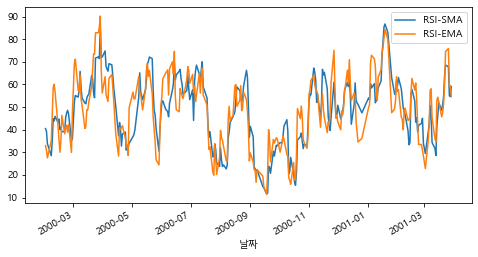

In [20]:
df['AU'] = df['상승폭'].rolling(14).mean()
df['DU'] = df['하락폭'].rolling(14).mean()
df['RSI-SMA'] = df['AU'] / (df['AU'] + df['DU']) * 100

df['AU'] = df['상승폭'].ewm(span=14, adjust=False).mean()
df['DU'] = df['하락폭'].ewm(span=14, adjust=False).mean()
df['RSI-EMA'] = df['AU'] / (df['AU'] + df['DU']) * 100

df[['RSI-SMA', 'RSI-EMA']].iloc[20:300].plot(figsize=(8, 4))

## 15.2 RSI 전략 백테스팅

In [67]:
from pykrx import stock
import numpy as np

df = stock.get_market_ohlcv_by_date("20000101", "20191231", "005930")
df = df[['종가']]

df['변화량'] = df['종가'] - df['종가'].shift(1)
df.loc[df['변화량'] >= 0, '상승폭'] = df['변화량']
df.loc[df['변화량'] < 0, '하락폭'] = -df['변화량']
df = df.fillna(0)

df['AU'] = df['상승폭'].rolling(14).mean()
df['DU'] = df['하락폭'].rolling(14).mean()
df['RSI'] = df['AU'] / (df['AU'] + df['DU']) * 100
df = df[['종가', 'RSI']]
df.head()

,종가,RSI
날짜,,
2000-01-04,6110,NaN
2000-01-05,5580,NaN
2000-01-06,5620,NaN
2000-01-07,5540,NaN
2000-01-10,5770,NaN


In [68]:
df['일간수익률'] = df['종가'].pct_change() + 1

In [69]:
df.loc[df['RSI'] < 30, '매매신호'] = True
df.loc[df['RSI'] > 70, '매매신호'] = False

In [70]:
# 전날 종가 매수면 당일은 보유
df.loc[df['매매신호'].shift(1) == True, '보유여부'] = True

# 전날 종가 매도면 당일은 미보유
df.loc[df['매매신호'].shift(1) == False, '보유여부'] = False

# 매수/매도 조건이 아니라면 전일 상태 유지
df['보유여부'].ffill(inplace=True)
df['보유여부'].fillna(False, inplace=True)

In [55]:
# df.loc['2000-02-03':].head(10)

,종가,RSI,일간수익률,매매신호,보유여부
날짜,,,,,
2000-02-03,5130,33.796296,0.977143,NaN,False
2000-02-07,5240,28.500000,1.021442,True,False
2000-02-08,5430,34.703196,1.036260,NaN,True
2000-02-09,5720,44.871795,1.053407,NaN,True
2000-02-10,5760,43.913043,1.006993,NaN,True
2000-02-11,5700,45.909091,0.989583,NaN,True
2000-02-14,5380,43.162393,0.943860,NaN,True
2000-02-15,5200,44.690265,0.966543,NaN,True
2000-02-16,5000,40.082645,0.961538,NaN,True


In [72]:
df['보유수익률'] = df.loc[ df['보유여부'] == True, '일간수익률']
df['보유수익률'].fillna(1, inplace=True)

In [73]:
df['RSI수익률'] = df['보유수익률'].cumprod()
df['단순보유수익률'] = df['종가'] / df.iloc[0, 0]
df.tail()

,종가,RSI,일간수익률,매매신호,보유여부,보유수익률,RSI수익률,단순보유수익률
날짜,,,,,,,,
2019-12-23,55500,81.460674,0.991071,False,False,1.0,4.836518,9.083470
2019-12-24,55000,81.005587,0.990991,False,False,1.0,4.836518,9.001637
2019-12-26,55400,81.720430,1.007273,False,False,1.0,4.836518,9.067103
2019-12-27,56500,82.105263,1.019856,False,False,1.0,4.836518,9.247136
2019-12-30,55800,74.468085,0.987611,False,False,1.0,4.836518,9.132570


<AxesSubplot:xlabel='날짜'>

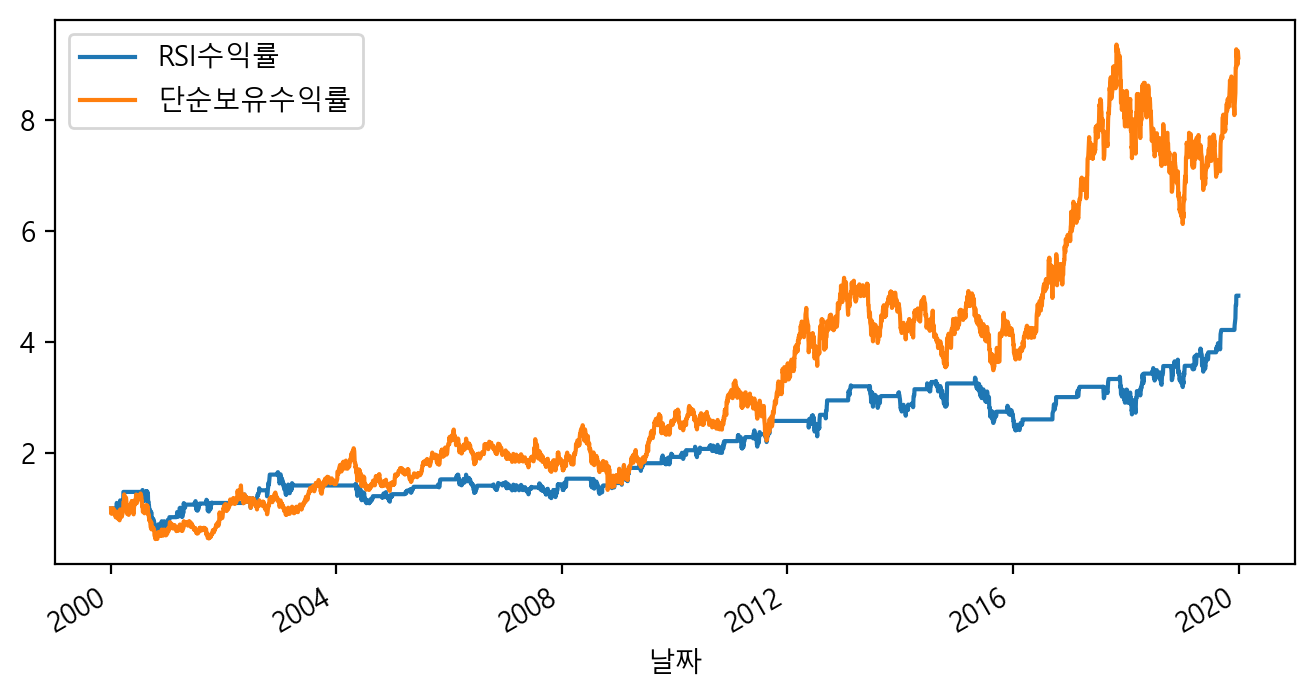

In [85]:
import matplotlib.pyplot as plt 
import platform
plt.rcParams['figure.dpi'] = 200

# 한글처리
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic') 
else:
    plt.rc('font', family='Malgun Gothic') 
    
df[['RSI수익률', '단순보유수익률']].plot(figsize=(8, 4))

## 15.3 RSI 전략 백테스팅(전종목)

In [2]:
from pykrx import stock
import time 
import os

if not os.path.isdir("data"):
    os.mkdir("data")

tickers = stock.get_market_ticker_list("20000101")
for t in tickers:    
    df = stock.get_market_ohlcv_by_date("20000101", "20191231", t)
    if df.empty:
        continue
        
    df.to_excel(f"data/{t}.xlsx")
    time.sleep(0.5)

In [3]:
def RSI(df, window=14, threshold_low=30, threshold_high=70):
    df = df.query('종가 != 0')
    df = df[['종가']].copy()
    df['변화량'] = df['종가'] - df['종가'].shift(1)
    df.loc[df['변화량'] >= 0, '상승폭'] = df['변화량']
    df.loc[df['변화량'] < 0, '하락폭'] = -df['변화량']
    df = df.fillna(0)
    df['AU'] = df['상승폭'].rolling(window).mean()
    df['DU'] = df['하락폭'].rolling(window).mean()
    df['RSI'] = df['AU'] / (df['AU'] + df['DU']) * 100
    df = df[['종가', 'RSI']].copy()

    df['일간수익률'] = df['종가'].pct_change() + 1
    df.loc[df['RSI'] < threshold_low, '매매신호'] = True
    df.loc[df['RSI'] > threshold_high, '매매신호'] = False
    df.loc[df['매매신호'].shift(1) == True, '보유여부'] = True
    df.loc[df['매매신호'].shift(1) == False, '보유여부'] = False

    df['보유여부'].ffill(inplace=True)
    df['보유여부'].fillna(False, inplace=True)
    df['보유수익률'] = df.loc[ df['보유여부'] == True, '일간수익률']
    df['보유수익률'].fillna(1, inplace=True)
    return df['보유수익률'].cumprod().iloc[-1]

In [4]:
import pandas as pd

yeild = [ ]
file_list = os.listdir('data')
for file in file_list:    
    df = pd.read_excel(f"data/{file}")        
    val = RSI(df)
    yeild.append(val)
    
s = pd.Series(yeild, index=file_list)    
s.describe()

count    6.870000e+02
mean     4.514772e+04
std      1.183232e+06
min      1.374279e-05
25%      4.020862e-01
50%      1.221849e+00
75%      3.272170e+00
max      3.101333e+07
dtype: float64

In [16]:
print(s.idxmax())

'008080.xlsx'

<AxesSubplot:xlabel='날짜'>

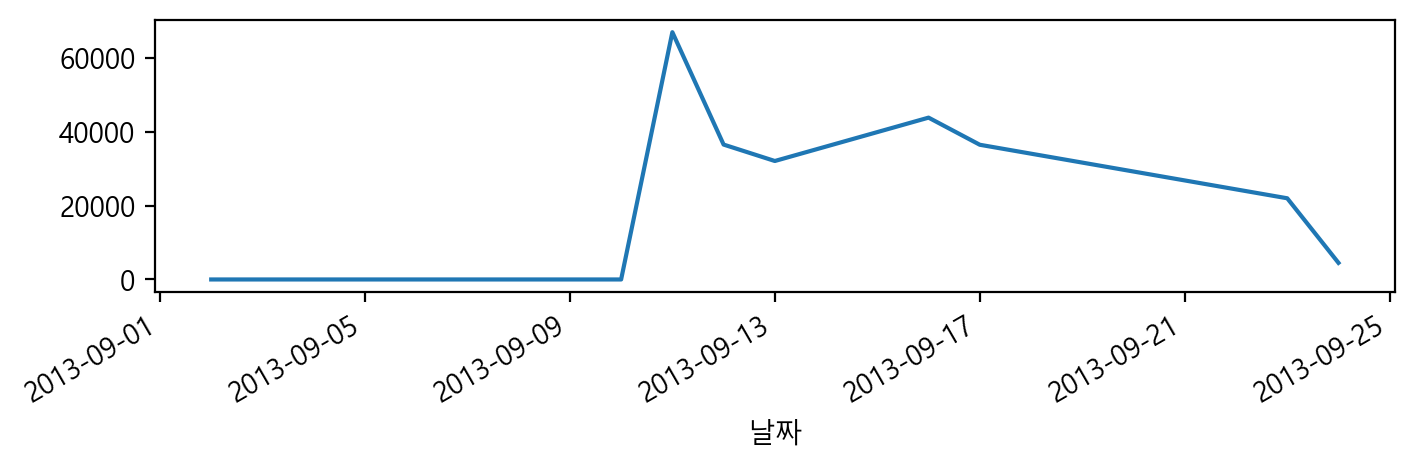

In [24]:
df = stock.get_market_ohlcv_by_date("20000101", "20191231", "008080")
df.loc['2013-09':, '종가'].plot(figsize=(8, 2))

In [38]:
print(s.idxmin())

007630.xlsx


In [42]:
df['종가'].tail()

날짜
2019-12-23    1225
2019-12-24    1225
2019-12-26    1225
2019-12-27    1225
2019-12-30    1225
Name: 종가, dtype: int32

<AxesSubplot:xlabel='날짜'>

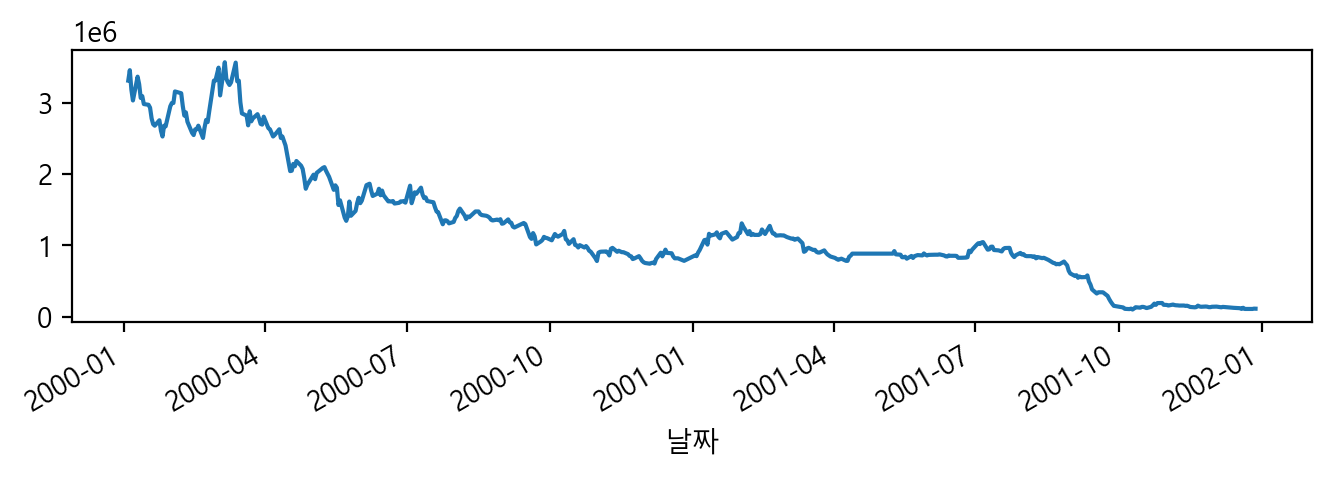

In [40]:
df = stock.get_market_ohlcv_by_date("20000101", "20191231", "007630")
df.loc[:"2001", '종가'].plot(figsize=(8, 2))

In [51]:
idx = [ ]
yeild = [ ]
file_list = os.listdir('data')
for file in file_list:    
    df = pd.read_excel(f"data/{file}")        
    cond = abs(df['종가'].pct_change()) > 0.3
    if len(df[cond]) != 0:
        continue
       
    val = RSI(df)
    idx.append(file.split(".")[0])
    yeild.append(val)
    
s = pd.Series(yeild, index=idx)    
s.describe()

count    499.000000
mean       3.116045
std        6.600518
min        0.002671
25%        0.601042
50%        1.452753
75%        3.365731
max      105.399369
dtype: float64

In [53]:
df = stock.get_index_ohlcv_by_date("20000101", "20191231", "1001")
print(df['종가'][-1]/df['종가'][0])

2.075152968726394
